# Explore here

In [1]:
# Your code here
import numpy  as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',None)

In [2]:
main_df =pd.read_csv('https://breathecode.herokuapp.com/asset/internal-link?id=439&path=housing.csv',)

In [3]:
main_df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422

<Axes: xlabel='Latitude', ylabel='Longitude'>

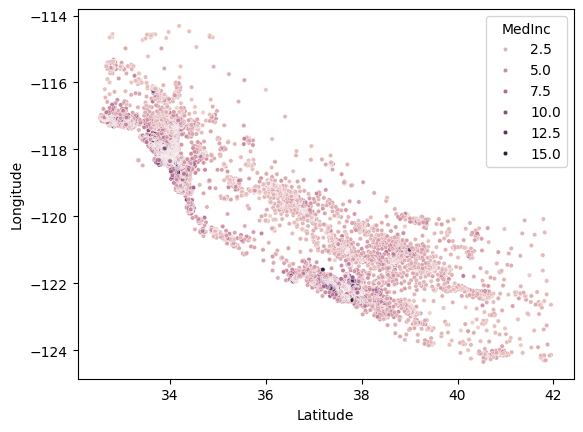

In [4]:
sns.scatterplot(data=main_df,x='Latitude',y='Longitude',hue='MedInc',s=10)

In [5]:
from sklearn.cluster import KMeans

KMeans, unsupervised learning (denetimsiz öğrenme) yöntemlerinden biri olan bir kümeleme (clustering) algoritmasıdır. Basitçe, veriyi benzer özelliklere sahip gruplara ayırmak için kullanılır.

In [6]:
# creating a copy of the original dataset, but only 3 columns of interest
# modelin hangi özellikleri kullanarak kümeleneceğini belirlemek ile ilgili
copy_df = main_df[['Latitude','Longitude','MedInc']].copy()

# call an unsupervised clustering instance
#fit the model
#predict a cluster for each row in the dataset
#K-Means Nesnesi Oluşturuluyor
#Model Veriye Fit Ediliyor
# Her Satır İçin Hangi Kümede Olduğu Tahmin Ediliyor
cluster_model = KMeans(n_clusters=5)
cluster_model.fit(copy_df)
copy_df['cluster'] = cluster_model.predict(copy_df)



<Axes: xlabel='Longitude', ylabel='Latitude'>

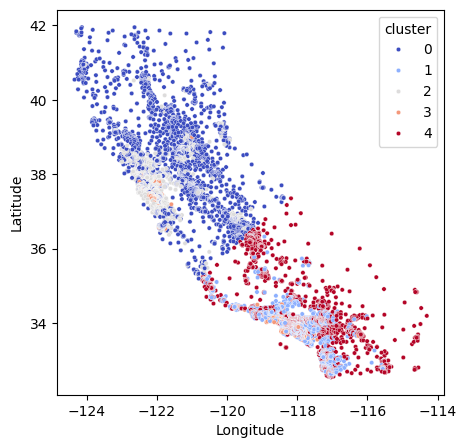

In [7]:
plt.figure(figsize=(5,5))

sns.scatterplot(data=copy_df, x='Longitude', y='Latitude', hue = 'cluster', palette='coolwarm',s=10)

Küçük, seçilmiş kolonlarla basit ve görselleştirilebilir kümeleme. ilk satirda 3 feature olarak yaptigimiz

Tüm kolonlarla genel ve daha gerçekçi kümeleme. bu alttaki 

In [8]:
#### Let's include more variables!
copy_df = main_df.copy()

unscaled_cluster = KMeans(n_clusters=(5))
unscaled_cluster.fit(copy_df)


KMeans(n_clusters=5)

In [9]:
copy_df['cluster'] = unscaled_cluster.predict(copy_df)

copy_df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  cluster  
0    -122.23        4.526        1  
1    -122.22        3.585        0  
2    -122.24        3.521        1  
3    -122.25        3.413        1  
4    -122.25        3.422        1

<Axes: xlabel='Longitude', ylabel='Latitude'>

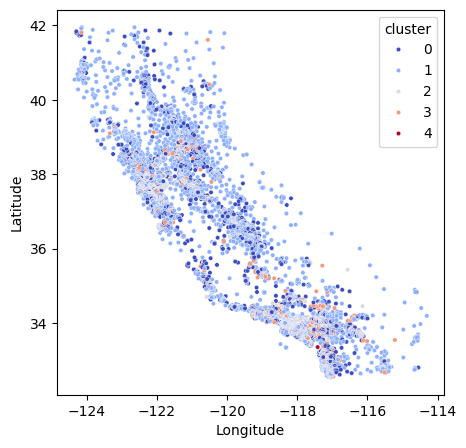

In [10]:
plt.figure(figsize=(5,5))

sns.scatterplot(data=copy_df, x='Longitude', y='Latitude', hue = 'cluster', palette='coolwarm',s=10)

### Let's try rescaling the data before calculating our clusters
bu Kümeleri hesaplamadan önce veriyi yeniden ölçeklendirmeyi (rescale) deneyelim. demek

In [11]:
copy_df.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal       cluster  
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558      0.849031  
std       10.386050      2.135952      2.003532      1.153956      0.844163  
min        0.692308     32.540000   -124.350000      0.149990      0.000000  
25%        2.429741     33.930000   -121.800000      1.196000      0.000000  
50%        2.818116     34.260000   -118.490000      1.797000      1.000000  
75%        3.282261     37.710000   -118.010000      2.647250      1.000000  
max     1243.333333     41.950000   -114.310000      5.000010      4.000000

In [12]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [13]:
copy_df = main_df.copy()

sc= StandardScaler()
scaled_df = sc.fit_transform(copy_df)
scaled_df = pd.DataFrame(scaled_df,columns=copy_df.columns)
scaled_df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  2.344766  0.982143  0.628559  -0.153758   -0.974429 -0.049597  1.052548   
1  2.332238 -0.607019  0.327041  -0.263336    0.861439 -0.092512  1.043185   
2  1.782699  1.856182  1.155620  -0.049016   -0.820777 -0.025843  1.038503   
3  0.932968  1.856182  0.156966  -0.049833   -0.766028 -0.050329  1.038503   
4 -0.012881  1.856182  0.344711  -0.032906   -0.759847 -0.085616  1.038503   

   Longitude  MedHouseVal  
0  -1.327835     2.129631  
1  -1.322844     1.314156  
2  -1.332827     1.258693  
3  -1.337818     1.165100  
4  -1.337818     1.172900

In [14]:
scaled_cluster_model = KMeans(n_clusters=5)
scaled_cluster_model.fit(scaled_df)

scaled_df['cluster'] = scaled_cluster_model.predict(scaled_df)

scaled_df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  2.344766  0.982143  0.628559  -0.153758   -0.974429 -0.049597  1.052548   
1  2.332238 -0.607019  0.327041  -0.263336    0.861439 -0.092512  1.043185   
2  1.782699  1.856182  1.155620  -0.049016   -0.820777 -0.025843  1.038503   
3  0.932968  1.856182  0.156966  -0.049833   -0.766028 -0.050329  1.038503   
4 -0.012881  1.856182  0.344711  -0.032906   -0.759847 -0.085616  1.038503   

   Longitude  MedHouseVal  cluster  
0  -1.327835     2.129631        3  
1  -1.322844     1.314156        3  
2  -1.332827     1.258693        2  
3  -1.337818     1.165100        2  
4  -1.337818     1.172900        2

<Axes: xlabel='Longitude', ylabel='Latitude'>

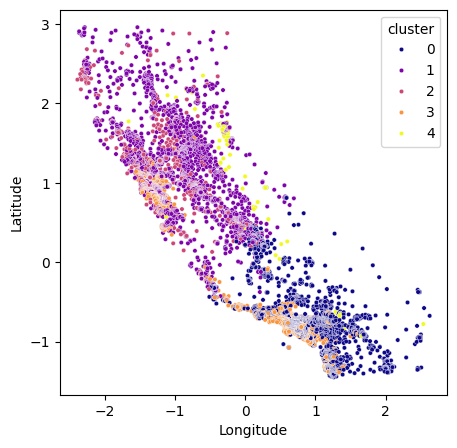

In [15]:
plt.figure(figsize=(5,5))

sns.scatterplot(data=scaled_df, x='Longitude', y='Latitude', hue = 'cluster', palette='plasma',s=10)

(0.0, 6.0)

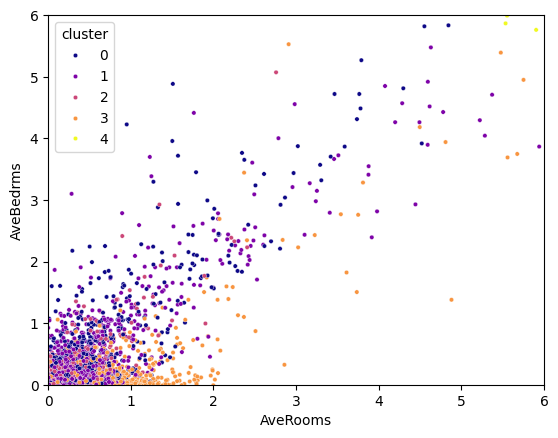

In [16]:
sns.scatterplot(data=scaled_df, x='AveRooms', y='AveBedrms', hue = 'cluster', palette='plasma',s=10)
plt.xlim(0,6)
plt.ylim(0,6)

<Axes: xlabel='Population', ylabel='AveOccup'>

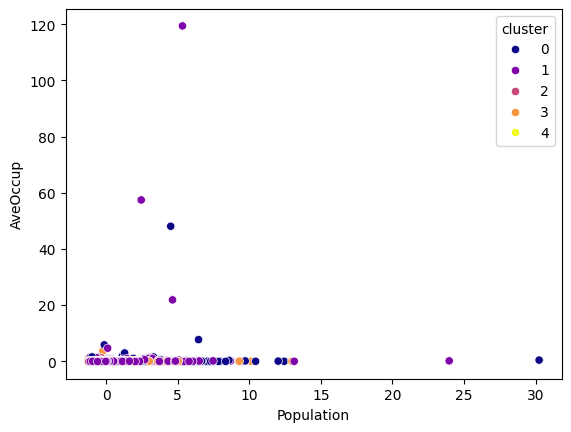

In [17]:

sns.scatterplot(data=scaled_df, x='Population', y='AveOccup', hue = 'cluster', palette='plasma')#,s=10)

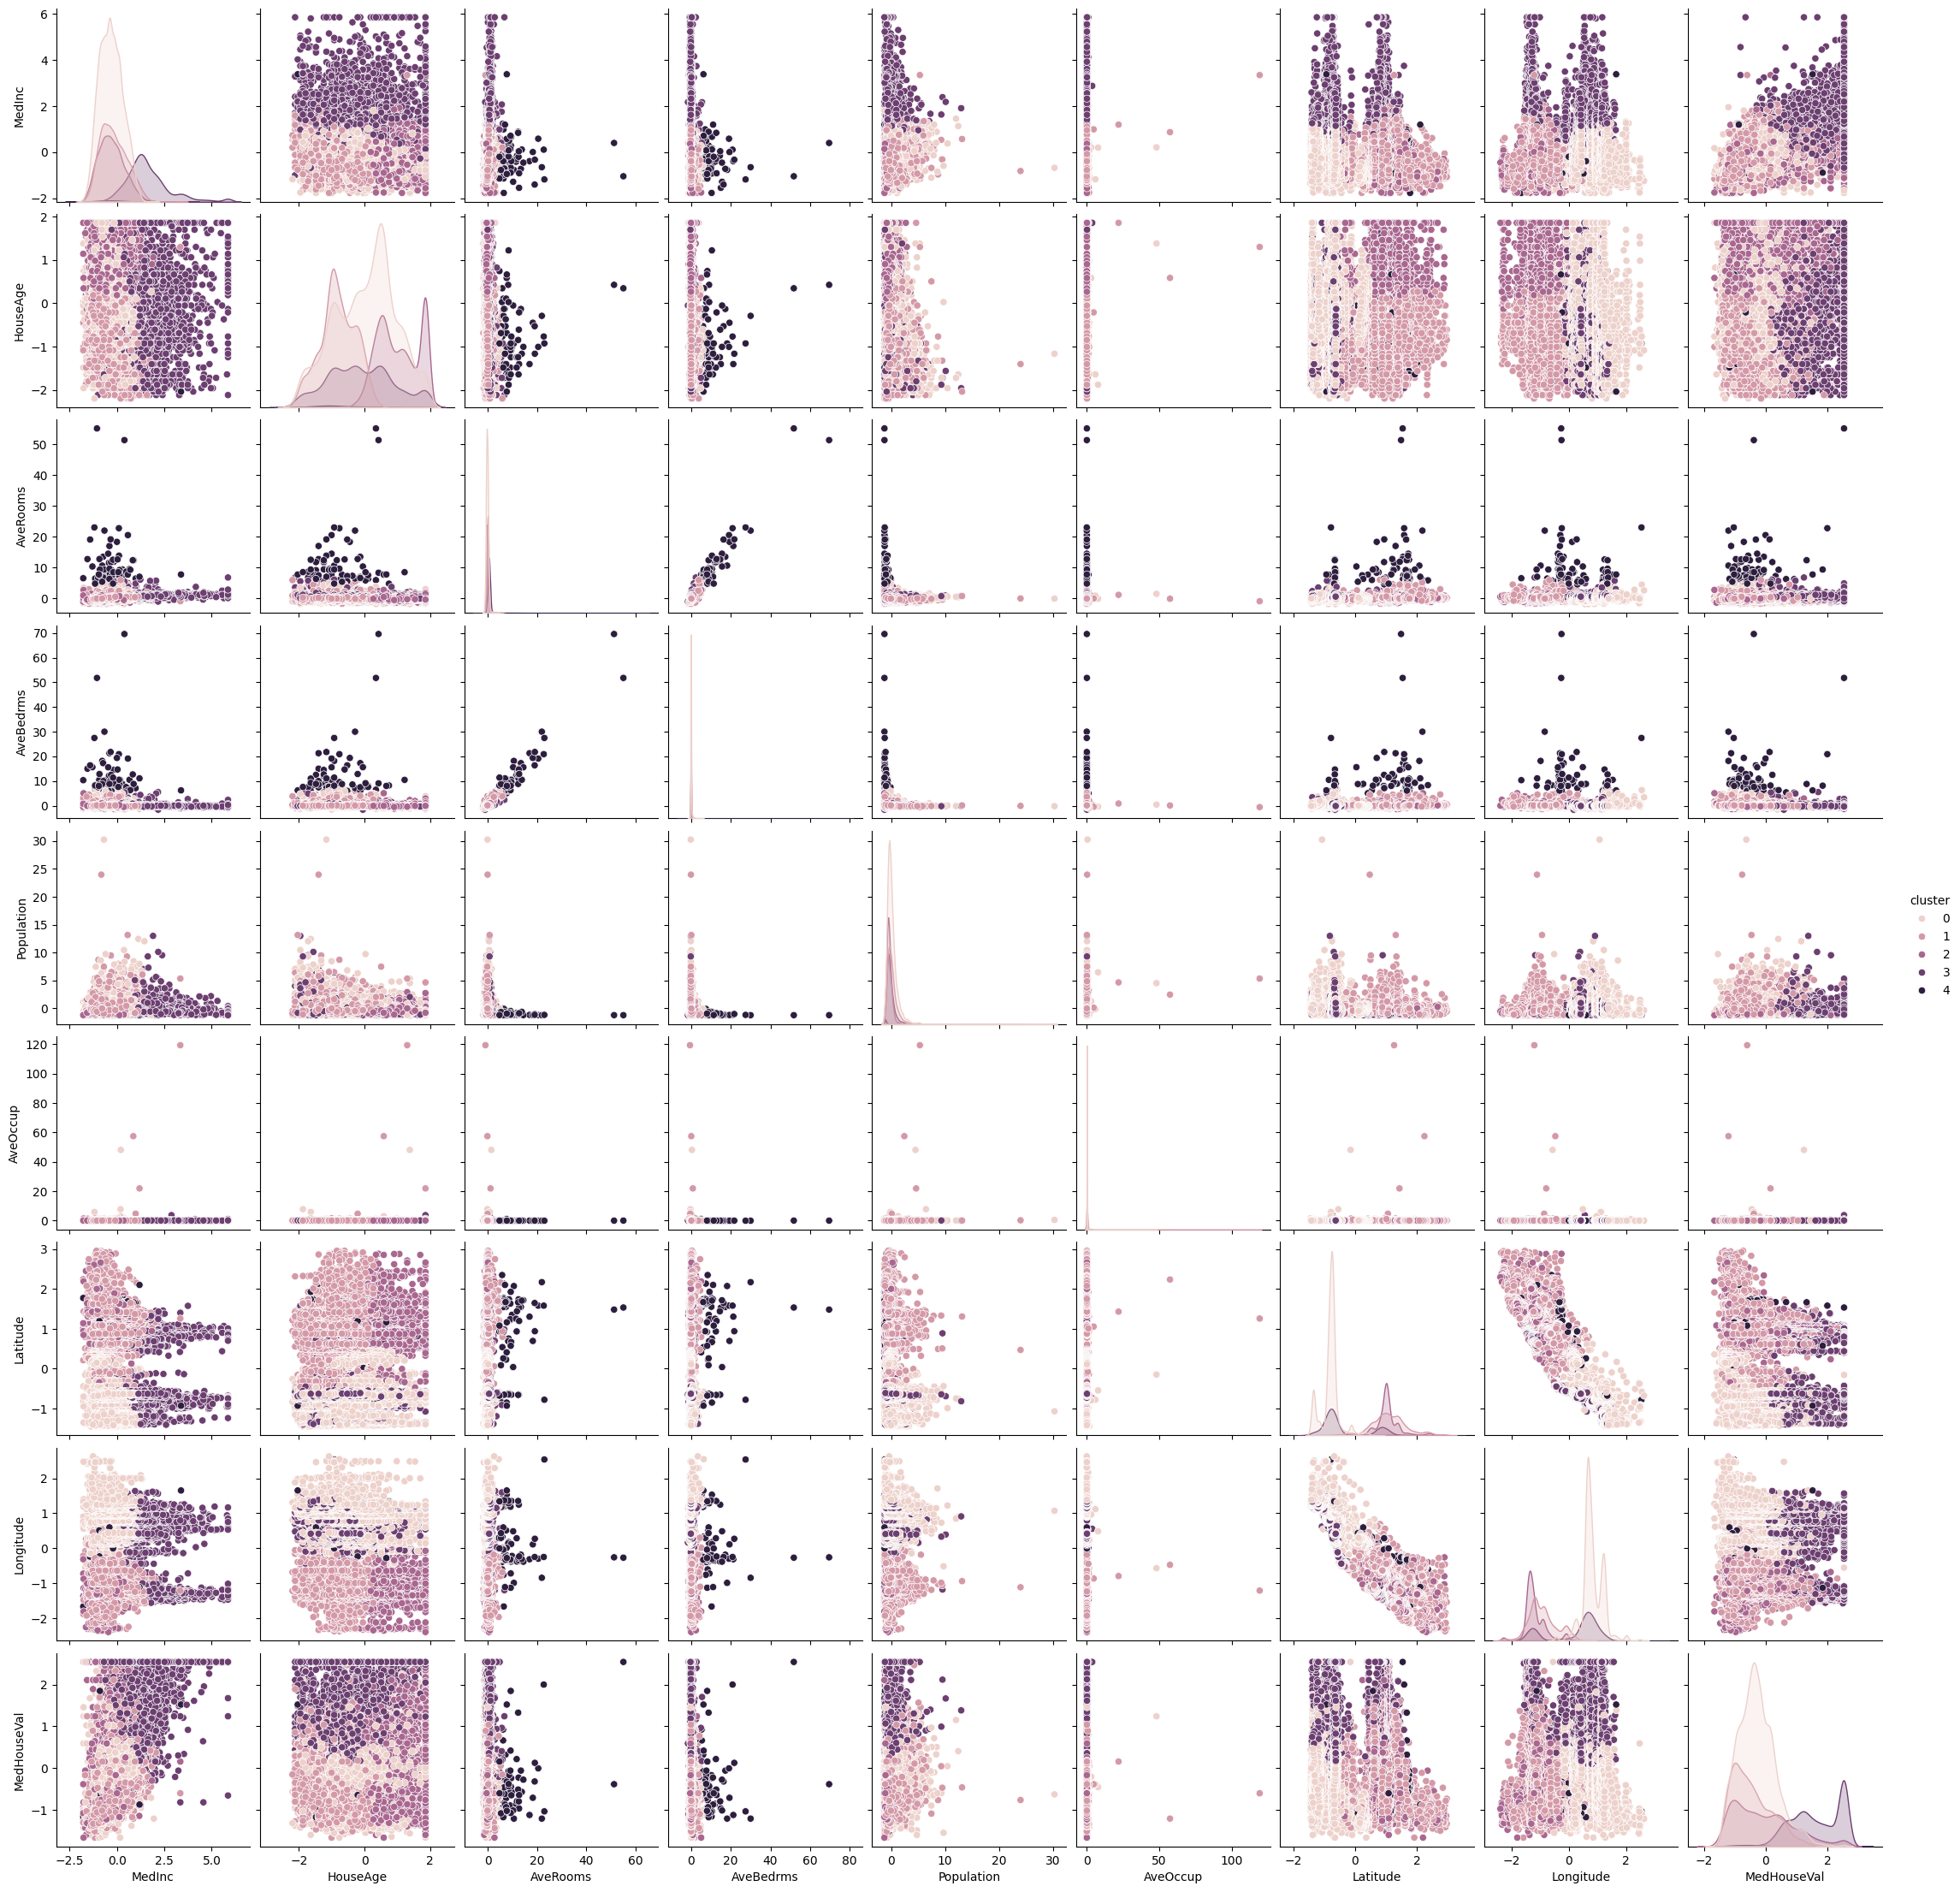

In [18]:
sns.pairplot(scaled_df, hue='cluster')

In [19]:
main_df['Latitude'] * main_df['Longitude'] + main_df['MedInc']

0       -4621.7472
1       -4618.9478
2       -4619.5266
3       -4621.5194
4       -4623.3163
           ...    
20635   -4779.0729
20636   -4784.0261
20637   -4778.0046
20638   -4781.7804
20639   -4770.8302
Length: 20640, dtype: float64

In [20]:
#lets build a supervised regression algorthm for median house value

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
train_df,test_df = train_test_split(main_df,random_state=46)

In [23]:
train_df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
10884  6.3427      15.0  8.166667   1.075758       287.0  4.348485     33.71   
18470  6.1684      13.0  6.256545   1.044503      2795.0  3.658377     37.15   
17884  5.2937      17.0  5.328904   1.024917      2286.0  3.797342     37.41   
8373   1.2094      21.0  3.181712   1.032825      1549.0  1.815944     33.96   
9502   2.2946      18.0  6.100271   1.382114      1032.0  2.796748     39.17   

       Longitude  MedHouseVal  
10884    -117.90        3.052  
18470    -121.64        2.881  
17884    -121.96        2.380  
8373     -118.35        1.575  
9502     -123.54        1.010

In [24]:
x_train = train_df.drop(columns = ['MedHouseVal'])
y_train = train_df['MedHouseVal']

In [25]:
x_test = test_df.drop(columns=['MedHouseVal'])
y_test = test_df['MedHouseVal']

In [26]:
type(x_test)

pandas.core.frame.DataFrame

In [27]:
ss = StandardScaler()

#scale the data based on training set, then fit the test set to that same training scale
x_train_ss = ss.fit_transform(x_train)
x_train_ss = pd.DataFrame(x_train_ss, columns = x_train.columns)

x_test_ss = ss.transform(x_test)
x_test_ss = pd.DataFrame(x_test_ss, columns = x_test.columns)

#fit a cluster model to the training set
cluster_model = KMeans(n_clusters=5)
cluster_model.fit(x_train_ss)

#predict clusters for both training and testing datasets
x_train_ss['cluster'] = cluster_model.predict(x_train_ss)
x_test_ss['cluster'] = cluster_model.predict(x_test_ss)

In [28]:
cluster_model.predict(pd.DataFrame(x_train_ss.iloc[12367]).T.drop(columns='cluster'))
#“X_train_ss’in 12367. satırındaki verinin hangi kümeye (cluster) ait olduğunu KMeans modeline soruyor.”

array([4], dtype=int32)

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error, mean_absolute_error

In [30]:
linreg_model = LinearRegression()
linreg_model.fit(x_train_ss, y_train)

train_preds = linreg_model.predict(x_train_ss)
test_preds = linreg_model.predict(x_test_ss)



MSE: 0.52
RMSE: 0.72
MAE: 0.53


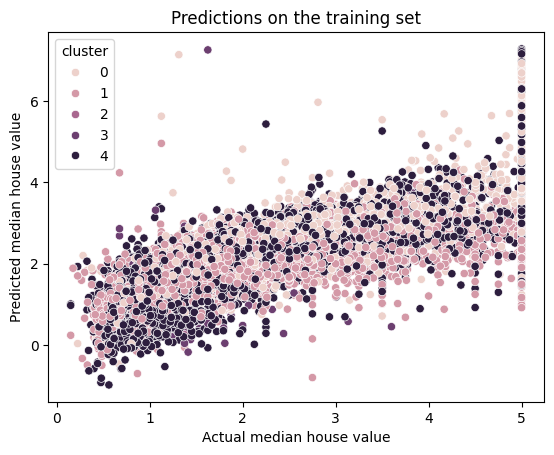

In [31]:
sns.scatterplot(x=y_train.reset_index(drop=True), y=train_preds, hue=x_train_ss['cluster'])
plt.xlabel('Actual median house value')
plt.ylabel('Predicted median house value')
plt.title("Predictions on the training set")

print(f"MSE: {round(mean_squared_error(y_train, train_preds),2)}")
print(f"RMSE: {round(root_mean_squared_error(y_train, train_preds),2)}")
print(f"MAE: {round(mean_absolute_error(y_train, train_preds),2)}")

MSE: 0.53
RMSE: 0.73
MAE: 0.54


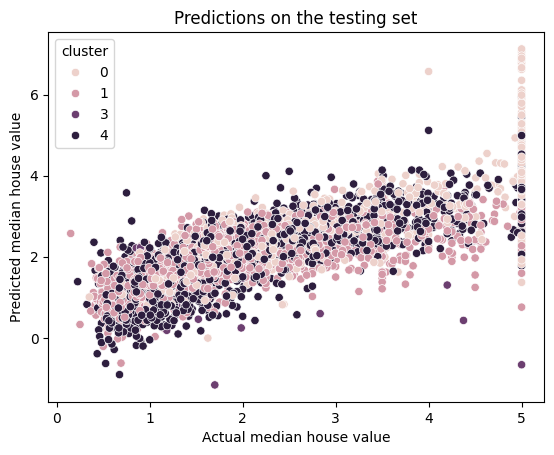

In [32]:
sns.scatterplot(x=y_test.reset_index(drop=True), y=test_preds, hue=x_test_ss['cluster'])
plt.xlabel('Actual median house value')
plt.ylabel('Predicted median house value')
plt.title("Predictions on the testing set")

print(f"MSE: {round(mean_squared_error(y_test, test_preds),2)}")
print(f"RMSE: {round(root_mean_squared_error(y_test, test_preds),2)}")
print(f"MAE: {round(mean_absolute_error(y_test, test_preds),2)}")

In [33]:
x_train_ss['cluster']

0        0
1        4
2        4
3        1
4        4
        ..
15475    1
15476    4
15477    4
15478    4
15479    1
Name: cluster, Length: 15480, dtype: int32

In [34]:
y_train

10884    3.052
18470    2.881
17884    2.380
8373     1.575
9502     1.010
         ...  
3787     1.854
17042    4.313
18835    0.813
18874    0.948
15549    1.151
Name: MedHouseVal, Length: 15480, dtype: float64

In [35]:
temp_df = pd.DataFrame(linreg_model.coef_, linreg_model.feature_names_in_)

temp_df

0
MedInc      0.849362
HouseAge    0.120496
AveRooms   -0.285342
AveBedrms   0.301853
Population -0.002226
AveOccup   -0.042260
Latitude   -0.878976
Longitude  -0.823052
cluster     0.020150

In [36]:
x_train.mean() * linreg_model.coef_[:8]

MedInc         3.293299
HouseAge       3.439043
AveRooms      -1.549941
AveBedrms      0.330946
Population    -3.187402
AveOccup      -0.129750
Latitude     -31.313046
Longitude     98.406155
dtype: float64

# Dimensionality Reduction via Principal Component Analysis (PCA)

In [37]:
x_train.var()

MedInc        3.613271e+00
HouseAge      1.583066e+02
AveRooms      5.406569e+00
AveBedrms     2.150420e-01
Population    1.325647e+06
AveOccup      1.198903e+02
Latitude      4.569599e+00
Longitude     4.017901e+00
dtype: float64

In [38]:
from sklearn.decomposition import PCA

In [40]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(x_train)
X_test_sc = sc.transform(x_test)

pca_model = PCA(n_components = 5)
X_train_pca = pca_model.fit_transform(X_train_sc)
X_test_pca = pca_model.transform(X_test_sc)

X_train_pca = pd.DataFrame(X_train_pca)
X_test_pca = pd.DataFrame(X_test_pca)

In [41]:
linreg_model_pca = LinearRegression()

linreg_model_pca.fit(X_train_pca, y_train)

train_preds = linreg_model_pca.predict(X_train_pca)
test_preds = linreg_model_pca.predict(X_test_pca)

MSE: 0.72
RMSE: 0.85
MAE: 0.64


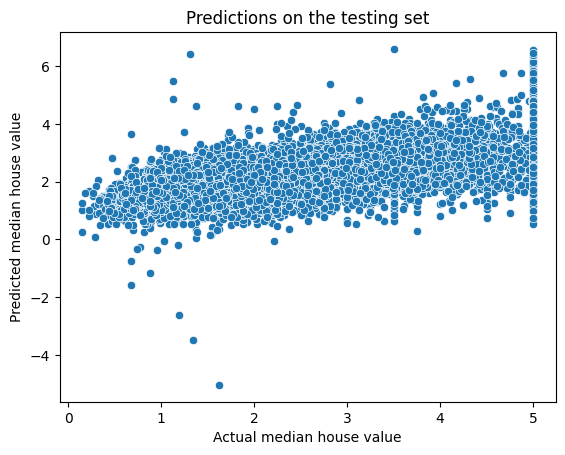

In [42]:
sns.scatterplot(x=y_train, y=train_preds)
plt.xlabel('Actual median house value')
plt.ylabel('Predicted median house value')
plt.title("Predictions on the testing set")

print(f"MSE: {round(mean_squared_error(y_train, train_preds),2)}")
print(f"RMSE: {round(root_mean_squared_error(y_train, train_preds),2)}")
print(f"MAE: {round(mean_absolute_error(y_train, train_preds),2)}")

MSE: 0.74
RMSE: 0.86
MAE: 0.66


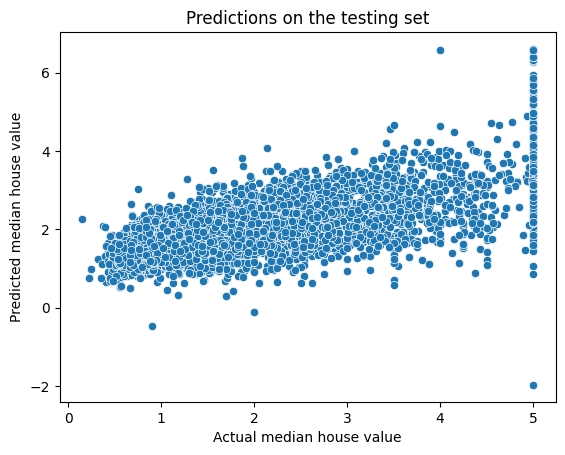

In [43]:
sns.scatterplot(x=y_test, y=test_preds)
plt.xlabel('Actual median house value')
plt.ylabel('Predicted median house value')
plt.title("Predictions on the testing set")

print(f"MSE: {round(mean_squared_error(y_test, test_preds),2)}")
print(f"RMSE: {round(root_mean_squared_error(y_test, test_preds),2)}")
print(f"MAE: {round(mean_absolute_error(y_test, test_preds),2)}")

In [44]:
linreg_model_pca.coef_

array([ 0.03385782,  0.1371266 ,  0.04930953,  0.7340994 , -0.08644319])

In [45]:
X_train_pca.head(1)

0        1        2         3         4
0 -0.145211  1.81326 -0.07564  1.344607 -0.254727

In [46]:
pd.DataFrame(X_train_sc)

0         1         2         3         4         5         6  \
0      1.296992 -1.076231  1.176192 -0.044477 -0.994363  0.116738 -0.895610   
1      1.205294 -1.235193  0.354679 -0.111879  1.183987  0.053709  0.713676   
2      0.745119 -0.917269 -0.044284 -0.154115  0.741889  0.066401  0.835309   
3     -1.403609 -0.599344 -0.967757 -0.137061  0.101760 -0.114564 -0.778656   
4     -0.832691 -0.837787  0.287468  0.616185 -0.347285 -0.024985  1.658665   
...         ...       ...       ...       ...       ...       ...       ...   
15475 -0.788604 -1.076231 -0.666511  0.179669  1.086708  0.005514 -0.680415   
15476  1.894636  0.354431  0.584546 -0.115459  1.096262 -0.023314  0.877412   
15477 -0.298757  0.354431  0.018171 -0.315005 -0.276932 -0.069957  2.860951   
15478 -0.232207  0.672356  0.036539 -0.143050  1.292557  0.040122  1.148745   
15479 -0.707217  0.195468 -0.574245 -0.253455 -0.113643  0.078564 -1.176300   

              7  
0      0.829433  
1     -1.036457  
2     -1.196105  
3      0.604928  
4     -1.984369  
...         ...  
15475  0.594949  
15476 -1.355754  
15477 -1.535358  
15478 -1.325820  
15479  1.238532  

[15480 rows x 8 columns]

In [48]:
pd.DataFrame(pca_model.components_, columns=x_train.columns).T

0         1         2         3         4
MedInc      0.097305  0.246845  0.223135  0.864364 -0.112321
HouseAge   -0.007298 -0.273623 -0.615083  0.153790  0.211841
AveRooms    0.446846  0.538262 -0.074703  0.049729  0.025593
AveBedrms   0.398810  0.486024 -0.216638 -0.351192  0.102896
Population -0.164510  0.108079  0.652257 -0.285488  0.048218
AveOccup   -0.014179  0.003293  0.160144  0.117176  0.963524
Latitude    0.565721 -0.379301  0.187694 -0.071139 -0.016580
Longitude  -0.533341  0.427423 -0.181812 -0.055862  0.016918